# Met Eireann wind speed analysis
## Programming for Data Analytics Project
Author: Vanessa de Oliveira Lyra


Met Éireann weather stations close to Wind Farms in Ireland with wind speed data available:  
- Mace Head (Galway)  
- Malin Head (Donegal)  
- Ireland West Knock Airport (Mayo)  
***- Ballyhaise (Cavan)  
- Gurteen (Tipperary)  
***- Mount Dillon (Roscommon)   

References:  
Weather stations and data: https://www.met.ie/climate/available-data/historical-data  
Weather stations proximity to Wind farms: https://chatgpt.com/share/695583bd-1238-8006-ac31-fcac77086ace

### Importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sb
import numpy as np
from windrose import WindroseAxes
import matplotlib.ticker as mtick

### Database connection

In [8]:
# Connecting to SQLite and creating database file
conn = sqlite3.connect("windspeed.db")

### Fetching data and dataset exploratory analysis:

Daily data files

In [9]:
# Mapping CSV filepaths
weather_files = {
    "mace": "datasets/dly275_mace_head.csv",
    "malin": "datasets/dly1575_malin_head.csv",
    "knock": "datasets/dly4935_knock_airport.csv",
    "gurteen": "datasets/dly1475_gurteen.csv",
    }

# Dictionary to store data
df_weather = {}

# For loop to read CSV files
for key, value in weather_files.items():
    df_weather[key] = pd.read_csv(value, skiprows=24) 

In [10]:
# Displaying first 5 rows of data for reference
df_weather["mace"].head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
0,14-aug-2003,0,19.2,0,9.0,,,0,0.0,1020.2,...,60,0,17,,,,,,,2432
1,15-aug-2003,0,19.3,0,11.2,,,0,0.0,1018.7,...,280,0,15,,,,,,,2284
2,16-aug-2003,0,19.4,0,11.0,,,0,0.0,1015.6,...,200,0,13,,,,,,,2084
3,17-aug-2003,0,17.0,0,14.4,,,0,3.3,1008.3,...,180,0,34,,,,,,,954
4,18-aug-2003,0,17.1,0,13.1,,,0,0.2,1011.9,...,270,0,28,,,,,,,1225


In [11]:
# Displaying data types and structure 
df_weather["mace"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    8093 non-null   object
 1   ind     8093 non-null   int64 
 2   maxtp   8093 non-null   object
 3   ind.1   8093 non-null   int64 
 4   mintp   8093 non-null   object
 5   igmin   8093 non-null   object
 6   gmin    8093 non-null   object
 7   ind.2   8093 non-null   int64 
 8   rain    8093 non-null   object
 9   cbl     8093 non-null   object
 10  wdsp    8093 non-null   object
 11  ind.3   8093 non-null   int64 
 12  hm      8093 non-null   object
 13  ind.4   8093 non-null   int64 
 14  ddhm    8093 non-null   object
 15  ind.5   8093 non-null   int64 
 16  hg      8093 non-null   object
 17  soil    8093 non-null   object
 18  pe      8093 non-null   object
 19  evap    8093 non-null   object
 20  smd_wd  8093 non-null   object
 21  smd_md  8093 non-null   object
 22  smd_pd  8093 non-null   

Relevant data for this project:  
- date: Date   
- rain: Precipitation Amount (mm)
- wdsp: Mean Wind Speed (kt)
- hm:   Highest ten minute mean wind speed (kt)  
- ddhm: Wind Direction at max 10 min mean (deg)                  
- hg:   Highest Gust (kt)

Date column is stored as object, convert to Datetime. Dates stored as DD-MM-YYYY  
Convert columns rain, wdsp, hm, ddhm and hg to integer.

Hourly data files

In [12]:
# Mapping CSV filepaths
weather_hly_files = {
    "mace_hly": "datasets/hly275_mace_head.csv",
    "malin_hly": "datasets/hly1575_malin_head.csv",
    "knock_hly": "datasets/hly4935_knock_airport.csv",
    "gurteen_hly": "datasets/hly1475_gurteen.csv"}    

# Dictionary to store data
df_weather_hly = {}

# For loop to read CSV files
# Stations with header on line 18
for key in ["mace_hly", "gurteen_hly"]:
    df_weather_hly[key] = pd.read_csv(weather_hly_files[key], skiprows=17,low_memory=False)

# Stations with header on line 24
for key in ["malin_hly", "knock_hly"]:
    df_weather_hly[key] = pd.read_csv(weather_hly_files[key], skiprows=23,low_memory=False)

In [13]:
# Displaying first 5 rows of data for reference
df_weather_hly["mace_hly"].head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,13-aug-2003 01:00,-1,,4,,4,,,,,,7,,7,
1,13-aug-2003 02:00,-1,,4,,4,,,,,,7,,7,
2,13-aug-2003 03:00,-1,,4,,4,,,,,,7,,7,
3,13-aug-2003 04:00,-1,,4,,4,,,,,,7,,7,
4,13-aug-2003 05:00,-1,,4,,4,,,,,,7,,7,


In [14]:
# Displaying data types and structure 
df_weather_hly["mace_hly"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195504 entries, 0 to 195503
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    195504 non-null  object
 1   ind     195504 non-null  int64 
 2   rain    195504 non-null  object
 3   ind.1   195504 non-null  int64 
 4   temp    195504 non-null  object
 5   ind.2   195504 non-null  int64 
 6   wetb    195504 non-null  object
 7   dewpt   195504 non-null  object
 8   vappr   195504 non-null  object
 9   rhum    195504 non-null  object
 10  msl     195504 non-null  object
 11  ind.3   195504 non-null  int64 
 12  wdsp    195504 non-null  object
 13  ind.4   195504 non-null  int64 
 14  wddir   195504 non-null  object
dtypes: int64(5), object(10)
memory usage: 22.4+ MB


Relevant data for this project:  
- date: Date and Time (utc)
- rain: Precipitation Amount (mm)	  
- temp: Air Temperature (C)	
- wdsp: Mean Wind Speed (knot)
- wddir: Predominant Wind Direction (degree)

Date column is stored as object, convert to Datetime. Dates stored as DD-MM-YYYY HH-MM
Convert columns rain, temp, wdsp and wwdir to integer.

##### References:
Skiprows function: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas   
Writing data to SQLite: https://stackoverflow.com/questions/14431646/how-to-write-pandas-dataframe-to-sqlite-with-index  
Importing multiple files: https://stackoverflow.com/questions/56155629/reading-multiple-csv-files-with-different-names-using-python-dictionary-in-a-for  
Low_memory from error: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False
Dataset exploratory analysis: https://milvus.io/ai-quick-reference/how-do-i-analyze-and-visualize-a-dataset

### Cleaning up dataset data

Daily data files

In [15]:
# List of columns from dataset to be dropped
drop_columns = ["ind","maxtp","ind.1","mintp","igmin","gmin","ind.2","cbl","ind.3","ind.4","ind.5","sun","dos","soil","pe","evap","smd_wd","smd_md","smd_pd","glorad"]

# Loop over all stations
for weather_files, df in df_weather.items():
    # Drop unwanted columns
    df.drop(columns=drop_columns, inplace=True, errors="ignore")
    
    # Normalizing date column
    # Removing white spaces from data using strip()
    # Converting data to datetime, coerce will replace any invalid dates with NaT
    df["date"] = df["date"].astype(str).str.strip()
    df["date"] = pd.to_datetime(df["date"], format="%d-%b-%Y", errors="coerce")
    
    # Convert dataset columns to numeric values using for loop
    for col in ["wdsp", "hm", "hg", "ddhm","rain"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # Update the dictionary with the cleaned data
    df_weather[weather_files] = df
    
    # Writing clean data to database, if data already exists, it will the replaced
    df.to_sql(f"{weather_files}_data", conn, if_exists="replace", index=False)

# Example: print Mace head after cleaning
# print(df_weather["mace"].head())

Hourly data files

In [16]:
# List of columns from dataset to be dropped
drop_columns = ["ind","ind.1","ind.2","ind.3","ind.4","wetb","dewpt","vappr","rhum","msl","ind.5","ind.6","ww","w","sun","vis","clht","clamt"]

# Loop over all stations
for weather_hly_files, df in df_weather_hly.items():
    # Drop unwanted columns
    df.drop(columns=drop_columns, inplace=True, errors="ignore")
    
    # Normalizing date column
    # Removing white spaces from data using strip()
    # Converting data to datetime, coerce will replace any invalid dates with NaT
    df["date"] = df["date"].astype(str).str.strip()
    df["date"] = pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M", errors="coerce")
    
    # Convert dataset columns to numeric values using for loop
    for col in ["wdsp", "temp", "wddir","rain"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # Update the dictionary with the cleaned data
    df_weather_hly[weather_hly_files] = df
    
    # Writing clean data to database
    df.to_sql(f"{weather_hly_files}_data", conn, if_exists="replace", index=False)

# Example: print Mace head after cleaning
# print(df_weather_hly["mace_hly"].head())

##### References
Remove whitespaces from date: https://medium.com/@amit25173/how-to-remove-whitespace-from-strings-in-pandas-bfd9acdc55f3  
Converting datetime: https://pbpython.com/pandas_dtypes.html  
Convert data to numeric values: https://kajodata.com/en/knowledge-base-excel-sql-python/knowledge-base-python-tech-skillshow-pandas-to_numeric-works-in-python-examples-mmk/  
Dates showing as NaT after claening data updated date format from %d-%b-%y to %d-%b-%Y to handle 4-digits year: https://medium.com/@codecorecomputercenter/python-date-formats-a-comprehensive-guide-c6ed0224980b     
For loop convert columns to numeric: https://stackoverflow.com/questions/50456153/use-to-numeric-on-certain-columns-only-in-pandas  

### Station names and labels

In [17]:
# List of stations to be analysed
all_stations = ["mace", "malin", "knock", "gurteen"]
all_stations_hly = ["mace_hly", "malin_hly","knock_hly", "gurteen_hly"]
labels = ["Mace Head", "Malin Head", "Ireland West Knock Airport", "Gurteen"]

### Wind Power calculation

Formula: $P (W) = \frac{1}{2} \, \rho \, v^3$

Where:  
ρ = density of the air 1.225 kg/m3  
v = velocity of the wind in m/s 

In [18]:
# Converting wind speed and calculating wind power, daily data
for key in all_stations:
    df = df_weather[key]
    # Converting wind speed from knots to m/s
    df["ms_wdsp"] = df["wdsp"] * 0.51444
    
    # Calculating wind power to each station
    df["wind_power"] = (0.5 * 1.255 * (df["ms_wdsp"] ** 3))

    # Saving data to SQL, getting file name, if table already exists it will be replaced
    df.to_sql(f"{key}_data",conn, if_exists="replace", index = False)

In [19]:
# Converting wind speed and calculating wind power, hourly data
for key in all_stations_hly:
    df = df_weather_hly[key]
    # Converting wind speed from knots to m/s
    df["ms_wdsp"] = df["wdsp"] * 0.51444
    
    # Calculating wind power to each station
    df["wind_power"] = (0.5 * 1.255 * (df["ms_wdsp"] ** 3))

    # Saving data to SQL, getting file name, if table already exists is will be replaced
    df.to_sql(f"{key}_data",conn, if_exists="replace", index = False)

##### References: 
Convert windspeed to m/s: https://datascience.stackexchange.com/questions/131732/wind-power-data-analysis-pythonhttps://datascience.stackexchange.com/questions/131732/wind-power-data-analysis-python  
Wind power calculation: https://vortexfdc.com/blog/from-weibull-to-wind-parameters/

### Station Wind Speed Statistics

Mean wind speed     : 7.450 m/s
Mean + 1σ           : 10.770 m/s
Mean - 1σ           : 4.131 m/s


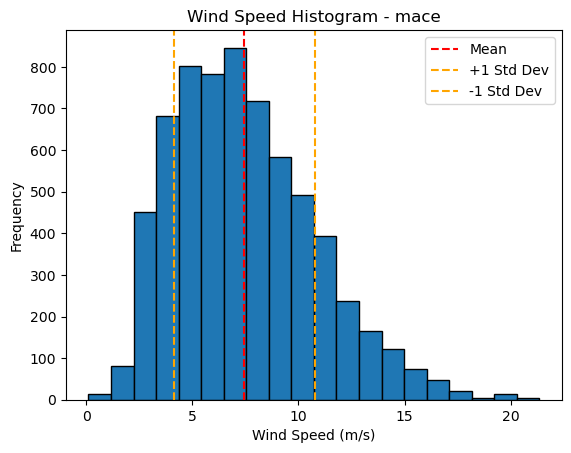

Mean wind speed     : 7.571 m/s
Mean + 1σ           : 10.682 m/s
Mean - 1σ           : 4.459 m/s


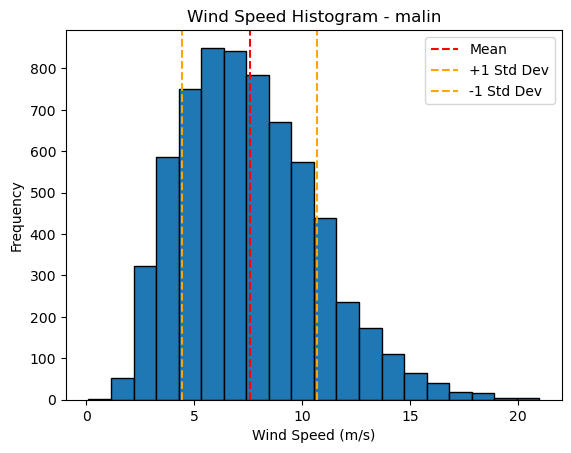

Mean wind speed     : 4.783 m/s
Mean + 1σ           : 6.706 m/s
Mean - 1σ           : 2.859 m/s


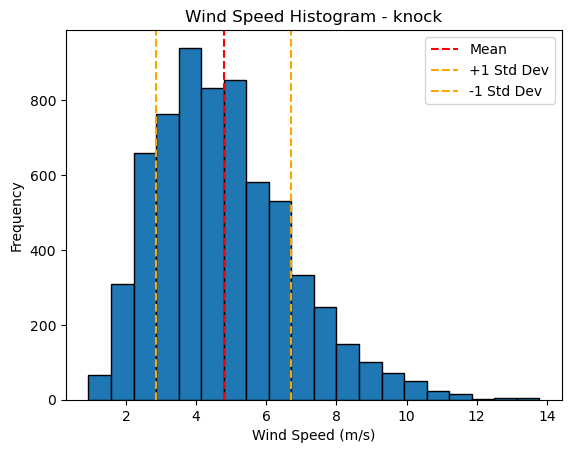

Mean wind speed     : 4.217 m/s
Mean + 1σ           : 6.067 m/s
Mean - 1σ           : 2.367 m/s


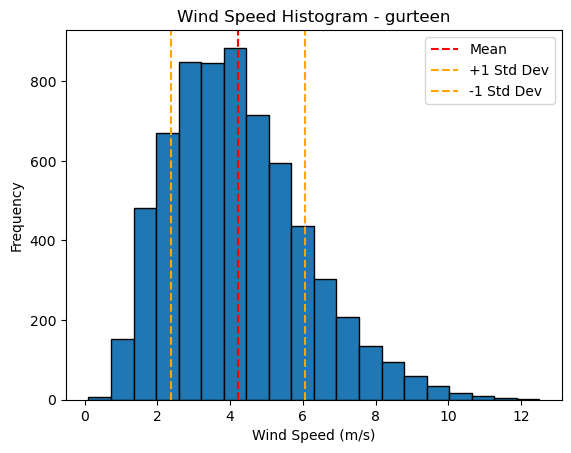

In [ ]:
# Looping through stations
for key in all_stations:
   # Retrieving DF for the station
   df = df_weather[key]

   # Filtering data by year for better comarison
   df_2008 = df[df["date"].dt.year >= 2008]

   # Getting stats for wdsp in m/s
   stats = df_2008["ms_wdsp"].describe()

   # Mean and value variable for plotting    
   mean_value = stats["mean"]
   std_value = stats["std"]

   # Plotting histogram with mean and +-1 deviation
   plt.hist(df_2008["ms_wdsp"], bins=20, edgecolor='black')
   plt.axvline(mean_value, color='red', linestyle='--', label='Mean') # Mean value (red dotted line)
   plt.axvline(mean_value + std_value, color='orange', linestyle='--', label='+1 Std Dev') # +1 Deviation (orange dotted line)
   plt.axvline(mean_value - std_value, color='orange', linestyle='--', label='-1 Std Dev') # -1 Deviation (orange dotted line)
    
   # Plotting data
   plt.title(f'Wind Speed Histogram - {key}')
   plt.xlabel('Wind Speed (m/s)')
   plt.ylabel('Frequency')
   plt.legend(loc='upper right')
   plt.show()

Data from 2008 was compared to ensure a similar frequency for analysis, Gurteen only began recording data in February of that year.

**Mace Head & Malin Head:**  
Both histograms shows a well spread wide range of wind speeds, there is a clear concentration of medium and high wind speeds. Average wind speed is around 7.4 and 7.5 m/s respectively, and highest frequencies between 4 and 10 m/s. The spread distribution shows that the wind speeds vary regularly and the high average indicates these are both windy locations, the wind is frequently strong and low wind conditions are relatively rare. Both very favourable to wind farms.

**Ireland West Knock Airport:**    
Knock's histogram is slightly narrower then the previous two, with average wind speed of 4.7 m/s, and higuest frequencies between 4 and 6 m/s. Higher wind speeds are less frequent, not a location with strong wind but windy enough to support wind farms.

**Gurteen:**    
The average wind speed is relatively low, around 4.2 m/s. The histogram shows a mixed distribution, with mostly low wind speeds and but a fair frequency. High wind speeds are very rare, the histogram is shifted to low wind range. The location is not consistently windy, but can somewhat support wind farms.

##### References

Filtering df.describe(): https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe  
Concatenating statistics: https://pandas.pydata.org/docs/user_guide/merging.html  
Removing extra column "wdsp" from final table: https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index  
Rounding column values: https://stackoverflow.com/questions/26133538/round-a-single-column-in-pandas
Histrogram, mean and deviation plot: https://dev.to/jumashafara/descriptive-statistics-1g1e#:~:text=Standard%20Deviation:%20It%20is%20the,Note!

### Hourly windspeed patterns (in m/s)

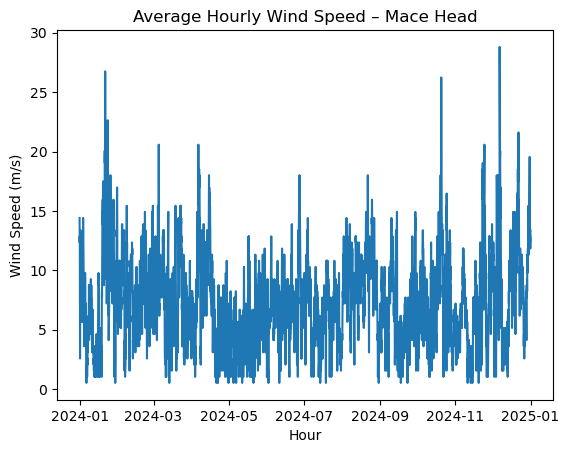

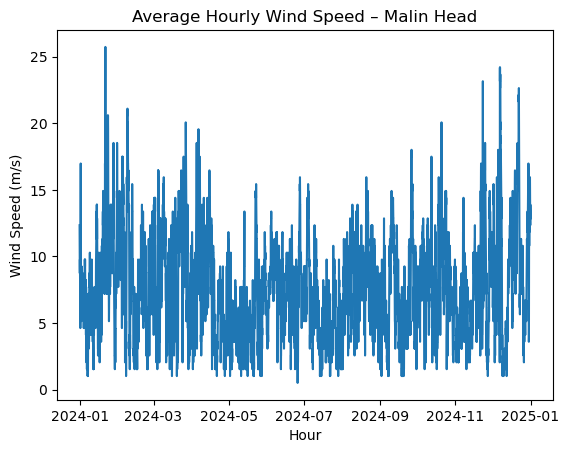

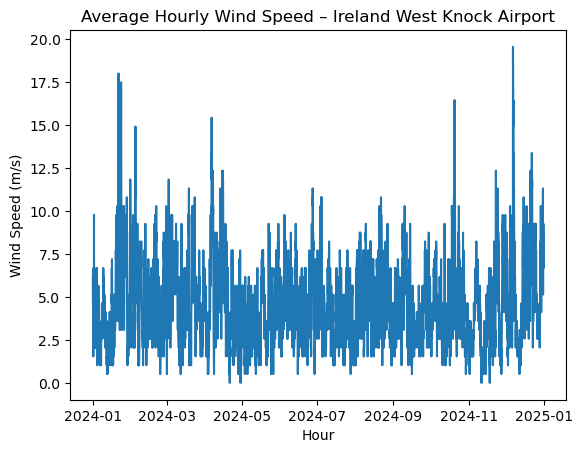

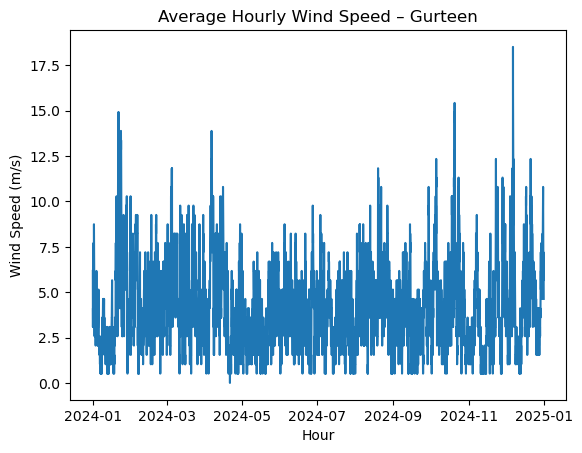

In [21]:
# Loop through stations
for i in range(len(all_stations_hly)): #Loop throught the length of the data, number of times to loop through
    station = all_stations_hly[i] # Get the weather station at a determined position, first loop will fetch data from position 0 and so on
    label = labels[i] # Same as above but with labels
    
     # Filtering data from year 2024
    df_2024 = df_weather_hly[station][df_weather_hly[station]["date"].dt.year == 2024]
    
    # Grouping date and wind speed and calculating mean hourly wind speed 
    hourly_mean = df_2024.groupby(df_2024["date"])["ms_wdsp"].mean()
    
    # Ploting results
    plt.plot(hourly_mean, label=label)

    # Printstatement for testing
    # print(monthly_mean)

    # Adding legend, title, and axis labels
    #plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
    plt.title(f"Average Hourly Wind Speed – {label}")
    plt.xlabel("Hour")
    plt.ylabel("Wind Speed (m/s)")

    plt.show()

Year 2024 chosen for analysis.

**Some pattern visible across locations:**  
Winds are stronger during Winter and weaker on Summer
Wind speeds significantly change on a hourly basis
Calm and strong winds are often seen within a day

Considering operational wind speeds for wind farms to be between - cut-in 3 m/s and cut-out 25m/s:

**Mace Head & Malin Head**  
The wind is strong and persistent it is possible to see long periods of operational wind and rare drops below cut-in, turbines can operate almost continuously. Very strong winds above cut-out are rare but occur in winter time. 

**Ireland West Knock Airport**  
Wind patterns are not as strong but stay mostly above cut-in often between 4 to 7 m/s, summer winds are noticeably less variable and calmer. Winds below cut-in are more frequent so causing some downtime as turbines accasionally stop. No records of winds above cut-out.

**Gurteen:**  
 The daily wind speed is low and inconsistent. Occasional short wind bursts seen and no winds above cut-out recorded. Wind speed variation is lower then other locations. Frequent calm winds below cut-in,causing frequent downtime and less energy production.

### Monthly windspeed patterns (in m/s)

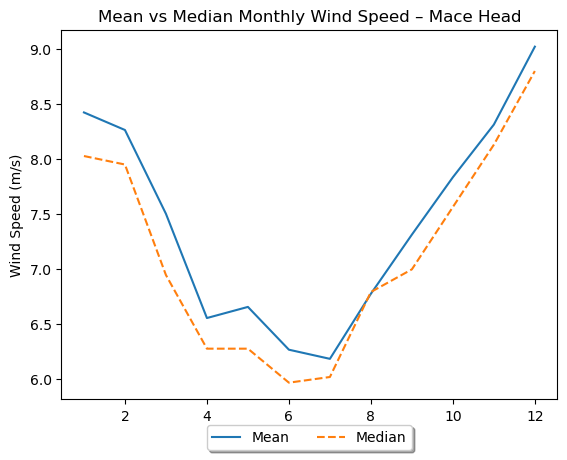

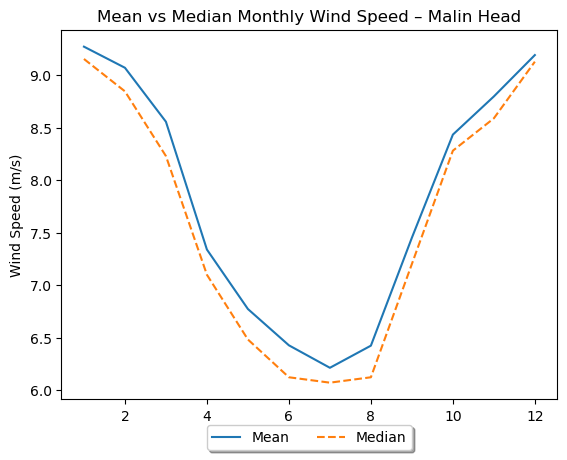

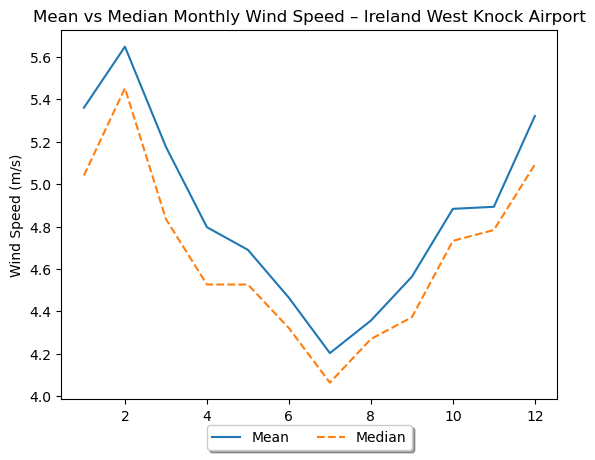

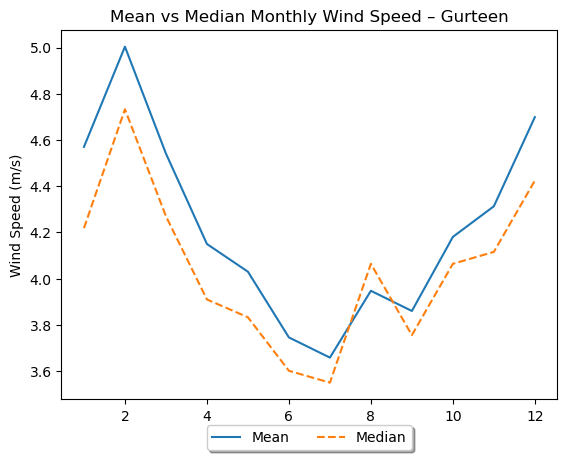

In [22]:
# Loop through stations
for i in range(len(all_stations)):
    station = all_stations[i] 
    label = labels[i] 
    
    # Grouping date and wind speed and calculating mean and median monthly wind speed
    monthly_mean = df_weather[station].groupby(df_weather[station]["date"].dt.month)["ms_wdsp"].mean()
    monthly_median = df_weather[station].groupby(df_weather[station]["date"].dt.month)["ms_wdsp"].median()

    # Ploting results
    plt.plot(monthly_mean, label="Mean")
    plt.plot(monthly_median, linestyle="--",label="Median")

    # Printstatement for testing
    # print(monthly_mean)

    # Adding legend, title, and axis labels
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5) # Definign legend location
    plt.title(f"Mean vs Median Monthly Wind Speed – {label}")
    plt.xlabel("Month")
    plt.ylabel("Wind Speed (m/s)")
    plt.show()

### Yearly windspeed patterns (in m/s)

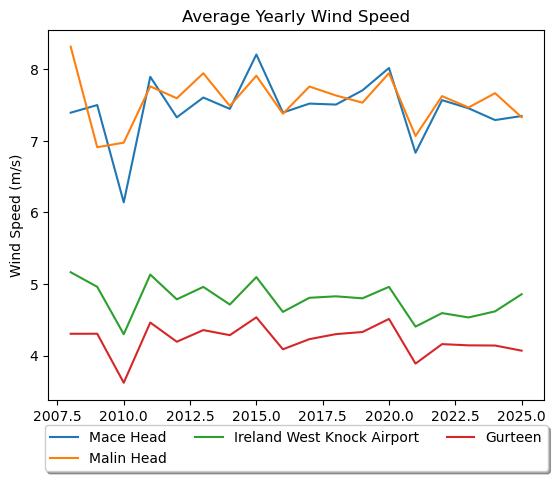

In [23]:
# Loop through stations
for i in range(len(all_stations)): 
    station = all_stations[i] 
    label = labels[i] 
    
    # Filtering data from year 2008 and on
    df_2008 = df_weather[station][df_weather[station]["date"].dt.year >= 2008]
    
    # Grouping data and wind speed and calculating mean yearly wind speed 
    yearly_mean = df_2008.groupby(df_2008["date"].dt.year)["ms_wdsp"].mean()

    # Ploting results
    plt.plot(yearly_mean, label=label)

# Adding legend, title, and axis labels
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=3)
plt.title("Average Yearly Wind Speed")
plt.xlabel("Year")
plt.ylabel("Wind Speed (m/s)")
plt.show()

##### References
Legend position: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

### Wind power stations stats

In [24]:
# Dictionary to store wind power stats
wdpw_stats = {}

# Loop through stations, retrieving statistics 
for key in all_stations:
    wdpw_stats[key] = df_weather[key][["wind_power"]].describe()

# Concatenating data side by side (axis=1) for better visualization, keys are column/station names
wdpw_stats_all = pd.concat(wdpw_stats.values(), axis=1, keys=wdpw_stats.keys())

# Removing unecessary header
wdpw_stats_all.columns = wdpw_stats_all.columns.droplevel(1)

# Round numbers, show one decimal
wdpw_stats_all = wdpw_stats_all.round(1)

# Printing result
print(wdpw_stats_all)

         mace    malin    knock  gurteen
count  8084.0  25779.0  10703.0   6503.0
mean    426.1    476.6    111.6     77.0
std     586.2    608.8    148.3    106.4
min       0.0      0.0      0.0      0.0
25%      73.2     96.1     23.5     14.2
50%     214.9    265.9     60.2     40.5
75%     532.2    623.8    140.4     96.1
max    6106.1   7681.6   1644.5   1225.8


In [25]:
# Debugging line, checking if calculated widspeed and wind power are in the database
# pd.read_sql("PRAGMA table_info(mace_data);", conn)

### Ranking stations by Wind Power

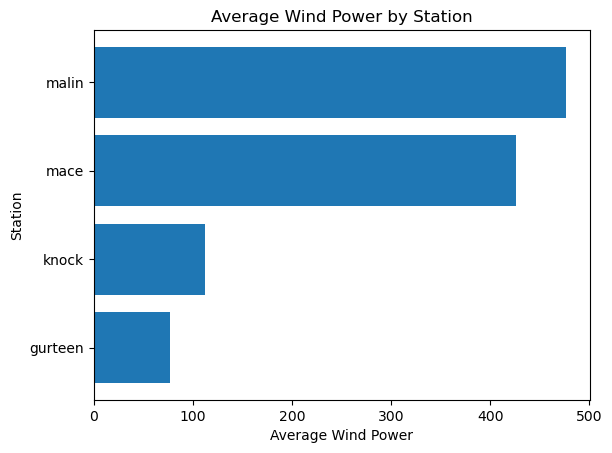

In [26]:
# Getting mean wind power from wdpw_stats_all
avg_wdpw = wdpw_stats_all.loc["mean"]

# Convert the Series to a DataFrame
df_wdpw = avg_wdpw.to_frame(name="Avg Wind Power")

# Sort stations from highest to lowest wind power
df_wdpw = df_wdpw.sort_values("Avg Wind Power", ascending=True)

# Plotting results, horizonatl plot
plt.barh(df_wdpw.index, df_wdpw["Avg Wind Power"])
plt.xlabel("Average Wind Power")
plt.ylabel("Station")
plt.title("Average Wind Power by Station")
plt.show()

##### References: 

Debugging line: https://stackoverflow.com/questions/66897013/sqlite-how-to-return-the-output-of-pragma-table-info-in-a-pandas-dataframe  
To_frame() function: https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe  
Sorting values: https://stackoverflow.com/questions/24988873/python-sort-descending-dataframe-with-pandas   
Horizontal plot: w3resource.com/pandas/dataframe/dataframe-plot-barh.php

### Boxplots - Wind Power Distribution per Station

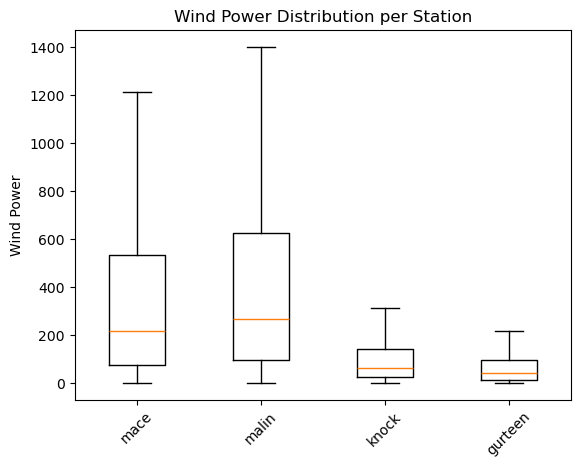

In [27]:
# Plotting boxplots looping through stations
plt.boxplot([df_weather[key]["wind_power"].dropna() for key in all_stations],tick_labels=all_stations,showfliers=False)
plt.xticks(rotation=45)
plt.ylabel("Wind Power")
plt.title("Wind Power Distribution per Station")
plt.show()

##### References:
Boxplots from multiple dictionaries: https://stackoverflow.com/questions/64169288/box-plot-a-data-from-dictionaries-key-in-python  
Including N/A values: https://stackoverflow.com/questions/79767967/making-matplotlib-boxplot-include-columns-with-nan-values  
Remove outliers for data: https://datascience.stackexchange.com/questions/54808/how-to-remove-outliers-using-box-plot  
Drop table: https://stackoverflow.com/questions/58951334/aiopg-sqlalchemy-how-to-drop-table-if-exists-without-raw-sql

### Wind farm active frequency

Wind turbine limits:  
Cut-in: ~3 m/s  
Cut-out: ~25 m/s  
Rated: ~12 m/s  

In [28]:
# Variable to store operational wind power
active_values = []

# Loop through all stations data
for key in all_stations:
    table_name = f"{key}_data"

# Calculating percentage of operational wind speed
# Count wind speed within 3 and 24
    query6 = f""" 
    SELECT 
        COUNT(CASE WHEN ms_wdsp >= 3 AND ms_wdsp < 25 THEN 1 END) * 100.0 / COUNT(*) AS active_wind_perc
    FROM {table_name}"""
    
    # Running query on Database, loading result to a dataframe and rounding results to one decimal
    result6 = pd.read_sql(query6, conn).round(1)
    result6["Station"] = key # Adding a new column with station names
    active_values.append(result6) # Appending each result to variable active_values

# Concating data from all stations to one dataframe
active_df = pd.concat(active_values, ignore_index=True)
# print(active_df)    

##### References: 

Wind turbine limits: https://www.nyserda.ny.gov/-/media/Project/Nyserda/Files/Publications/Research/Biomass-Solar-Wind/NY-Wind-Energy-Guide-1.pdf, pp.5  
pd.DataFrame.from_dict function: https://builtin.com/data-science/dictionary-to-dataframe#:~:text=pandas.-,DataFrame.,parsed%20as%20a%20DataFrame%20row.  

In [30]:
# Debugging, see windspeed and wind power results
# pd.read_sql("SELECT ms_wdsp, wind_power FROM mace_data LIMIT 5;", conn)

### Wind farm downtime frequency

In [31]:
# Variable to store downtime values
downtime_values = []

# Loop through all stations data
for key in all_stations:
    table_name = f"{key}_data"

# Calculating percentage of downtime
# Count when windspeed is < 3 or >= 25
    query = f""" 
    SELECT 
        COUNT(CASE WHEN ms_wdsp < 3 THEN 1 END) * 100.0 / COUNT(*) AS light_wind_perc,
        COUNT(CASE WHEN ms_wdsp >= 25 THEN 1 END) * 100.0 / COUNT(*) AS strong_wind_perc
    FROM {table_name}"""
    
    # Running query on Database, loading result to a dataframe and rounding results to one decimal
    result = pd.read_sql(query, conn).round(1)
    result["Station"] = key # Adding a new column with station names
    downtime_values.append(result) # Appending each result to variable downtime_values

# Concating data from all stations to one dataframe
downtime_df = pd.concat(downtime_values, ignore_index=True)
#print(downtime_df)    

##### References:

SQL count query: https://www.interviewquery.com/p/sql-count-case-when  
Fixing error "unterminated f-string literal": https://stackoverflow.com/questions/68025686/how-to-do-python-f-strings-in-triple-quotes  
Round statement: https://stackoverflow.com/questions/76649671/how-do-i-round-the-numbers-in-a-df-column-correctly-in-python  
Appending reults to DF and concat: https://stackoverflow.com/questions/18107953/how-to-create-a-large-pandas-dataframe-from-an-sql-query-without-running-out-of  

### Active vs Downtime frequency plot

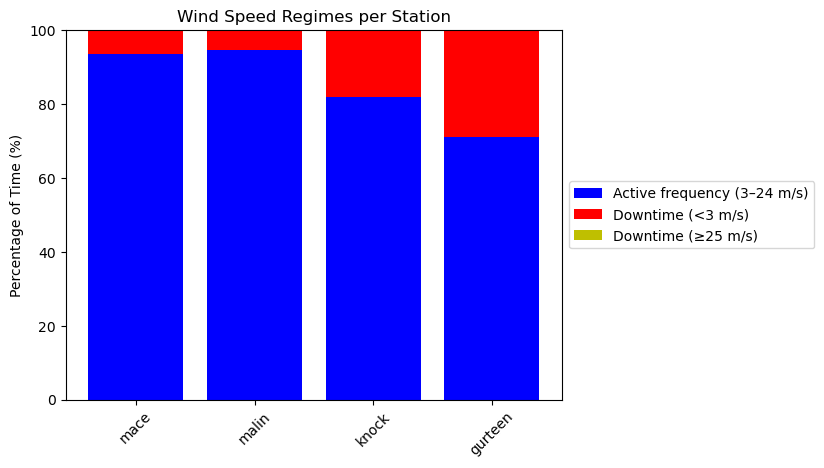

In [32]:
# Variables for plotting, accessing data from dataframes
stations = active_df["Station"]
active_freq = active_df["active_wind_perc"]
calm_freq = downtime_df["light_wind_perc"]
strong_freq = downtime_df["strong_wind_perc"]

# Plotting stacked bar plot
plt.bar(stations, active_freq,color="b") # Active frequency
plt.bar(stations, calm_freq,bottom=active_freq,color="r") # Calm wind(middle
plt.bar(stations,strong_freq,bottom=active_freq + calm_freq,color="y")# Strong wind

plt.ylabel("Percentage of Time (%)")
plt.title("Wind Speed Regimes per Station")
plt.xticks(rotation=45)
plt.legend(["Active frequency (3–24 m/s)","Downtime (<3 m/s)","Downtime (≥25 m/s)"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### Reference: 
https://www.geeksforgeeks.org/python/create-a-stacked-bar-plot-in-matplotlib/

### Seasonal average wind power

In [33]:
# Variable to store wind power by season
season_wdpw = []

# Loop through stations from all_stations
for key in all_stations:
    # Getting table names to be looped through, station name + _data
    table_name = f"{key}_data"

    # Query to calculate wind power by season
    # Each season is divided by its corresponden month number, strftime gets the month portion of the date
    query1 = f"""
    SELECT 
        CASE 
            WHEN strftime("%m", date) IN ("12","01","02") THEN "Winter"
            WHEN strftime("%m", date) IN ("03","04","05") THEN "Spring"
            WHEN strftime("%m", date) IN ("06","07","08") THEN "Summer"
            ELSE "Autumn"
        END AS season,
        AVG(wind_power) AS avg_season
    FROM {table_name}
    GROUP BY 
        CASE 
            WHEN strftime("%m", date) IN ("12","01","02") THEN "Winter"
            WHEN strftime("%m", date) IN ("03","04","05") THEN "Spring"
            WHEN strftime("%m", date) IN ("06","07","08") THEN "Summer"
            ELSE "Autumn"
        END
    """

    # Running query on Database, loading result to a dataframe and rounding results to one decimal
    result1 = pd.read_sql(query1, conn).round(1)
    result1["Station"] = key # Adding a new column with station names
    season_wdpw.append(result1) # Appending each result to variable season_wdpw

# Concating data from all stations to one dataframe
season_df = pd.concat(season_wdpw, ignore_index=True)

# Pivoting data for visualization
season_pvt = season_df.pivot(
    index="Station",
    columns="season",
    values="avg_season")

# Turning station from index to a normal column
season_pvt = season_pvt.reset_index()
print(season_pvt)


season  Station  Autumn  Spring  Summer  Winter
0       gurteen    70.5    77.2    48.9   113.4
1         knock   104.4   111.6    72.0   159.9
2          mace   466.8   335.6   257.1   649.9
3         malin   527.8   429.3   250.7   706.1


Hourly variation by season

In [34]:
# Variable to store wind power by season
hly_season_wdpw = []

# Loop through stations from all_stations
for key in all_stations_hly:
    # Getting table names to be looped through, station name + _data
    table_name = f"{key}_data"

    # Query to calculate wind power by season
    # Each season is divided by its corresponden month number, strftime gets the month portion of the date
    query4 = f"""
    SELECT
    CASE
        WHEN strftime('%m', date) IN ('12','01','02') THEN 'Winter'
        WHEN strftime('%m', date) IN ('03','04','05') THEN 'Spring'
        WHEN strftime('%m', date) IN ('06','07','08') THEN 'Summer'
        ELSE 'Autumn'
    END AS season_hly,
    strftime('%H', date) AS hour,
    AVG(wind_power) AS avg_season_hly
    FROM {table_name}
    GROUP BY season_hly, hour
    ORDER BY season_hly, hour;
    """

    # Running query on Database, loading result to a dataframe and rounding results to one decimal
    result4 = pd.read_sql(query4, conn).round(1)
    result4["Station"] = key # Adding a new column with station names
    hly_season_wdpw.append(result4) # Appending each result to variable season_wdpw

# Concating data from all stations to one dataframe
season_df_hly = pd.concat(hly_season_wdpw, ignore_index=True)

# Pivoting data for visualization
season_pvt_hly = season_df.pivot(
    index="Station",
    columns="season",
    values="avg_season")

# Turning station from index to a normal column
season_pvt = season_pvt.reset_index()
print(season_pvt)

season  index  Station  Autumn  Spring  Summer  Winter
0           0  gurteen    70.5    77.2    48.9   113.4
1           1    knock   104.4   111.6    72.0   159.9
2           2     mace   466.8   335.6   257.1   649.9
3           3    malin   527.8   429.3   250.7   706.1


##### References:

Code inspiration SQL query: https://stackoverflow.com/questions/51250537/case-when-expression-for-dates-in-sql-query  
Code inspiration 2 SQL query:https://stackoverflow.com/questions/650480/get-month-from-datetime-in-sqlite  
Fixing error "no such column: season" Group by SQL : https://www.geeksforgeeks.org/sqlite/sqlite-group-by-clause/  
Pivot data: https://www.influxdata.com/blog/pandas-pivot-tutorial/#:~:text=index:%20The%20index%20parameter%20sets,Here's%20a%20detailed%20breakdown:
Reset index: https://www.dataquest.io/blog/tutorial-reset-index-in-pandas/  
Reset index: https://stackoverflow.com/questions/40914200/can-i-assign-a-reset-index-a-name

### Seasonal heatmap

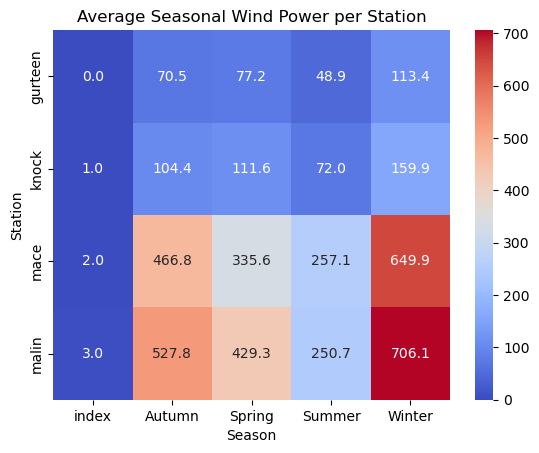

In [35]:
sb.heatmap(season_pvt.set_index("Station"), fmt=".1f", annot=True, cmap="coolwarm")
plt.title("Average Seasonal Wind Power per Station")
plt.ylabel("Station")
plt.xlabel("Season")
plt.show()

Heatmap: https://indianaiproduction.com/seaborn-heatmap/  
Remove long numbers from heatmap, one decimal place: https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format

### Station trends

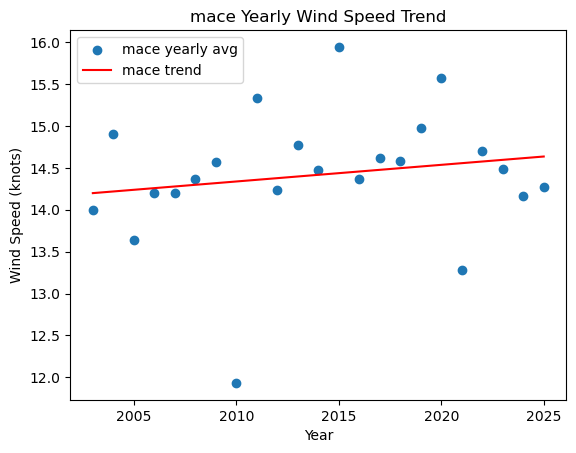

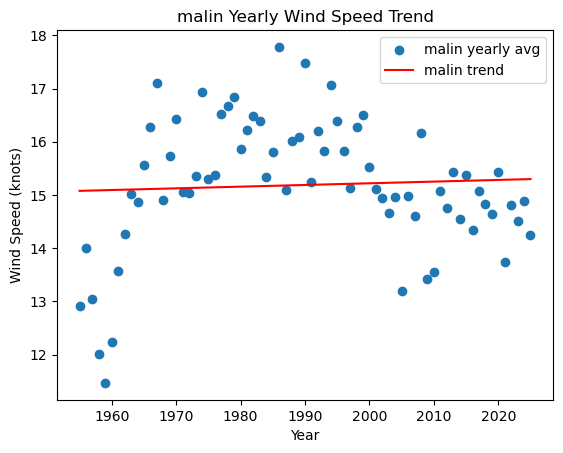

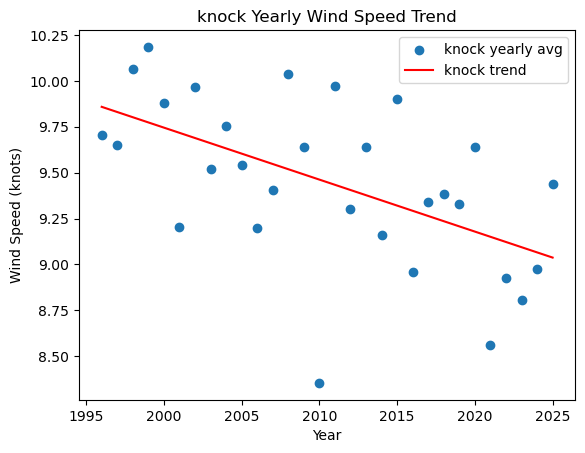

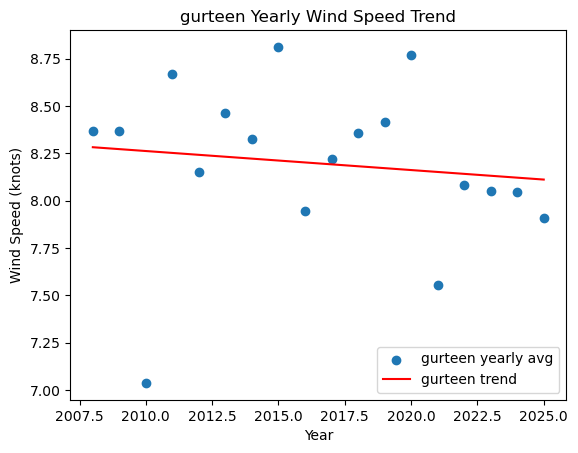

In [36]:
# Loop through stations
for i in range(len(all_stations)): #Loop throught the length of the data, number of times to loop through
    station = all_stations[i] # Get the weather station at a determined position, first loop will fetch data from position 0 and so on
    label = labels[i] # Same as above but with labels
    
    # Grouping data and windspeed and calculating men windspeed per month
    yearly_mean = df_weather[station].groupby(df_weather[station]["date"].dt.year)["wdsp"].mean()
    
    x = yearly_mean.index.values
    y = yearly_mean.values
    
    coeffs = np.polyfit(x, y, 1)
    trend = coeffs[0] 
    #print(f"{station}: trend = {trend:.3f} knots/year") 

    y_fit = np.polyval(coeffs, x) 
    plt.scatter(x, y, label=f"{station} yearly avg")
    plt.plot(x,y_fit, color= "red", label=f"{station} trend")
    plt.title(f"{station} Yearly Wind Speed Trend")
    plt.xlabel("Year")
    plt.ylabel("Wind Speed (knots)")
    plt.legend()
    plt.show()

##### Reference: 
https://medium.com/@amit25173/understanding-numpy-polyfit-with-step-by-step-examples-78247c0a9eed

### Heavy rain analysis

In [37]:
# Variable to store rain data
rain_percentage = []

# Loop through all stations data
for key in all_stations:
    table_name = f"{key}_data"

# Calculating percentage of heavy rain
# Count when rain => 20
    query2 = f""" 
    SELECT 
        COUNT(CASE WHEN rain >= 20 THEN 1 END) * 100.0 / COUNT(*) AS heavy_rain_perc
    FROM {table_name}"""
    
    # Running query on Database, loading result to a dataframe and rounding results to one decimal
    result2 = pd.read_sql(query2, conn).round(1)
    result2["Station"] = key # Adding a new column with station names
    rain_percentage.append(result2) # Appending each result to variable rain_percentage

# Concating data from all stations to one dataframe
rain_df = pd.concat(rain_percentage, ignore_index=True)
print(rain_df)    

   heavy_rain_perc  Station
0              1.3     mace
1              1.2    malin
2              1.8    knock
3              1.1  gurteen


##### References:
Heavy rain threshhold: https://www.sciencedirect.com/science/article/pii/S0960148119319159, topic 2.1

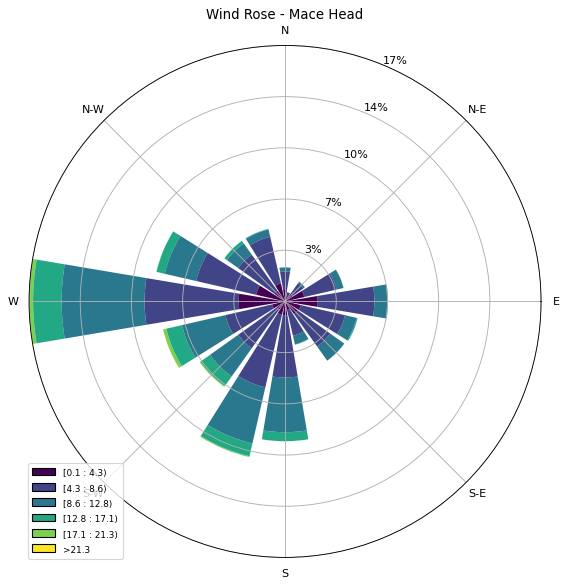

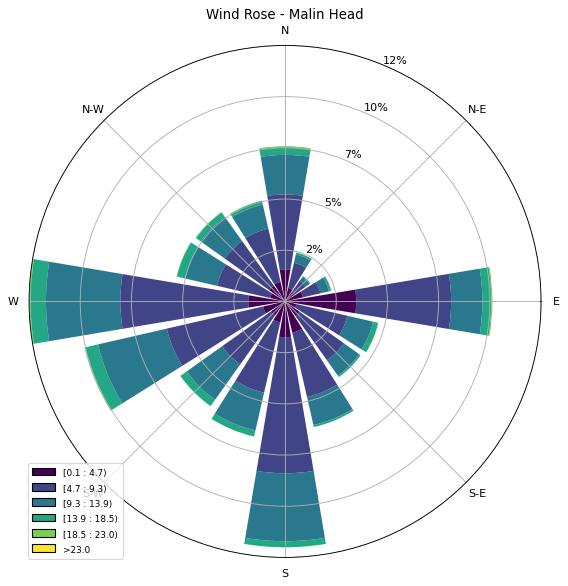

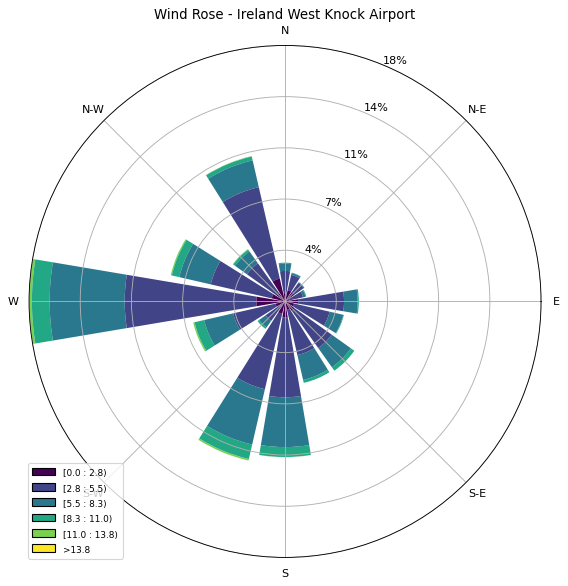

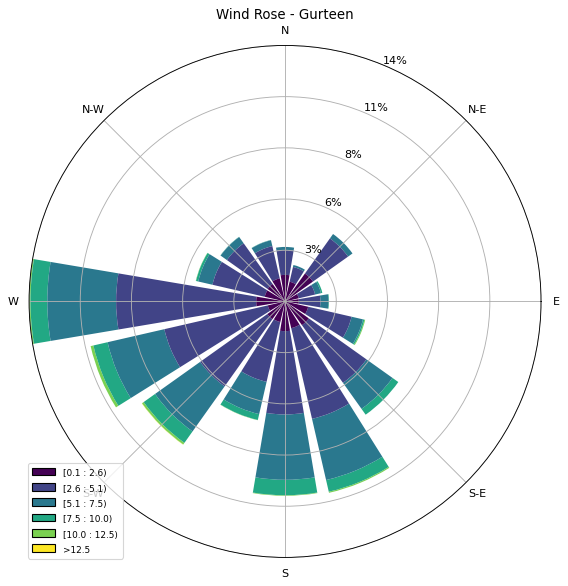

In [38]:
for i in range(len(all_stations)): #Loop throught the length of the data, number of times to loop through
    station = all_stations[i] # Get the weather station at a determined position, first loop will fetch data from position 0 and so on
    label = labels[i] # Same as above but with labels
    
    ax = WindroseAxes.from_ax()
    ax.bar(df_weather[station]["ddhm"], df_weather[station]["ms_wdsp"], normed=True, opening=0.85)
    ax.set_legend()
    fmt = '%.0f%%' 
    yticks = mtick.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)
    plt.title(f"Wind Rose - {label}")
    plt.show()

#df_2008 = df_weather[station][df_weather[station]["date"].dt.year >= 2008]

##### References
Plot wind roses: https://medium.com/@benjamin.ganko/wind-roses-in-python-pretty-straight-forward-sort-of-d859e64c5fba

Other Metrics (Rain, Temperature)

In [39]:
##trends, histograms, or correlations:
# Correlation between wind speed and temperature
#df[["wdsp_ms","temp"]].corr()
